In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names = ['label','id','date','noquery','handler','tweet'])

In [3]:
tweets.head()

,label,id,date,noquery,handler,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets[tweets['handler']=='jtmal0723']

,label,id,date,noquery,handler,tweet
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
500,0,1467936498,Mon Apr 06 22:53:39 PDT 2009,NO_QUERY,jtmal0723,@Anistorm Sorry
1733,0,1468219521,Tue Apr 07 00:22:07 PDT 2009,NO_QUERY,jtmal0723,@jmielcarz send some of that warmness my way.....
37902,0,1573108534,Mon Apr 20 23:45:17 PDT 2009,NO_QUERY,jtmal0723,@Anistorm what's wrong?
261409,0,1985909023,Sun May 31 18:00:15 PDT 2009,NO_QUERY,jtmal0723,likes that it is windy at work so he isn't as ...
606365,0,2222571467,Thu Jun 18 07:09:49 PDT 2009,NO_QUERY,jtmal0723,@twckellycass the light at the video wall is r...
866347,4,1677596948,Sat May 02 02:57:06 PDT 2009,NO_QUERY,jtmal0723,"@TWCWeekends Happy 27th birthday, you guys"
1288967,4,2002549306,Tue Jun 02 04:31:54 PDT 2009,NO_QUERY,jtmal0723,@YourWxToday other than a few burnt out lights...


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
label      1600000 non-null int64
id         1600000 non-null int64
date       1600000 non-null object
noquery    1600000 non-null object
handler    1600000 non-null object
tweet      1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
tweets.drop(['id', 'date','noquery','handler'], axis=1, inplace=True)

In [7]:
tweets.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
tweets.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
4      800000  793506              good morning   118

In [9]:
tweets['length'] = tweets['tweet'].apply(len)
tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [10]:
tweets['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [11]:

tweets['label'] = tweets['label'].map({0: 0, 4: 1})

In [12]:
tweets.length.describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

In [13]:
tweets[tweets['length'] == 359]['tweet']

380539     @neospace à¹à¸£à¸·à¹à¸­à¸à¸à¸±à¹à¸à¸à¸£...
1582941    5 days till new top gear  î?î?î?î?î?î?î?...
Name: tweet, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C004CC780>,
      dtype=object)

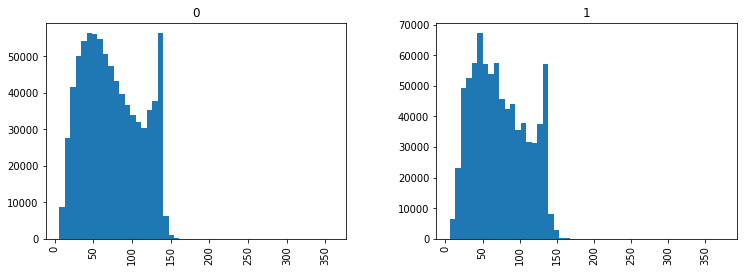

In [14]:
tweets.hist(column='length', by='label', bins=50,figsize=(12,4))

In [15]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re

In [16]:
# pat1 = r'@[A-Za-z0-9]+'
# pat2 = r'https?://[A-Za-z0-9./]+'
# combined_pat = r'|'.join((pat1, pat2))

# def tweet_cleaner(text):
#     soup = BeautifulSoup(text, 'lxml')
#     souped = soup.get_text()
#     stripped = re.sub(combined_pat, '', souped)
#     try:
#         clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
#     except:
#         clean = stripped
#     letters_only = re.sub("[^a-zA-Z]", " ", clean)
#     lower_case = letters_only.lower()
#     # During the letters_only process two lines above, it has created unnecessay white spaces,
#     # I will tokenize and join together to remove unneccessary white spaces
#     words = tok.tokenize(lower_case)
#     return (" ".join(words)).strip()


pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [17]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(tweets)):
    if( (i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" %(i+1,len(tweets)))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(tweets['tweet'][i]))

Cleaning the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed


C:\Users\arush\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed


C:\Users\arush\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed
Wall time: 17min 7s


In [18]:
len(clean_tweet_texts)

1600000

In [19]:
clean_tweets = pd.DataFrame(clean_tweet_texts,columns=['clean tweet'])
clean_tweets['label'] = tweets['label']

In [20]:
clean_tweets['label'].value_counts()

1    800000
0    800000
Name: label, dtype: int64

In [21]:
clean_tweets.to_csv('clean_tweet.csv',encoding='utf-8')

In [22]:
csv = 'clean_tweet.csv'
clean_tweets = pd.read_csv(csv,index_col=0)
clean_tweets.head()

C:\Users\arush\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [23]:
clean_tweets.head()

,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [24]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [25]:
clean_tweets[clean_tweets.isnull().any(axis=1)].head()

,clean tweet,label
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [26]:
np.sum(clean_tweets.isnull().any(axis=1))

3959

In [27]:
clean_tweets.isnull().any(axis=0)

clean tweet     True
label          False
dtype: bool

It seems like 3,959 entries have null entries for the text column. This is strange, because the original dataset had no null entries, and if there are any null entries in the cleaned dataset, it must have happened during the cleaning process.

In [28]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding = 'latin-1',header=None)
df.iloc[clean_tweets[clean_tweets.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


By looking at these entries in the original data, it seems like only text information they had was either twitter ID or it could have been URL address. Anyway, these are the info we decided to discard for the sentiment analysis, so we will drop these null rows, and update the data frame.

In [29]:
clean_tweets.dropna(inplace=True)
clean_tweets.reset_index(drop=True,inplace=True)
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [30]:
clean_tweets['label'].value_counts()

0    798197
1    797844
Name: label, dtype: int64

## Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.Some of the concerns over word cloud is that, it supports only the crudest sorts of textual analysis, and it is often applied to situations where textual analysis is not appropriate, and it leaves viewers to figure out the context of the data by themselves without providing the narrative.

But in the case of tweets, textual analysis is the most important analysis, and it provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

In [31]:
neg_tweets = clean_tweets[clean_tweets['label'] == 0]
neg_string = []
for t in neg_tweets['clean tweet']:
     neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

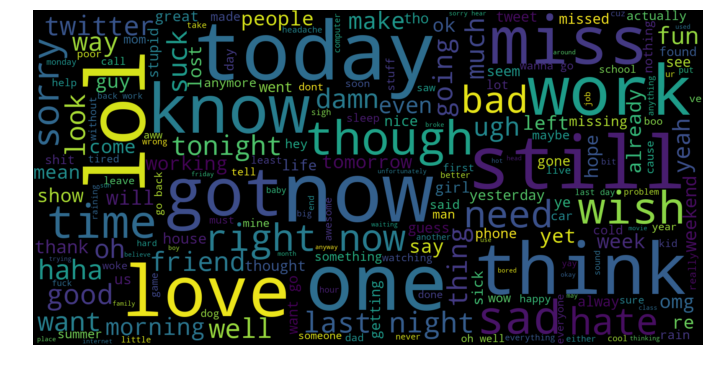

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [33]:
pos_tweets = clean_tweets[clean_tweets['label'] == 1]
pos_string = []
for t in pos_tweets['clean tweet']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

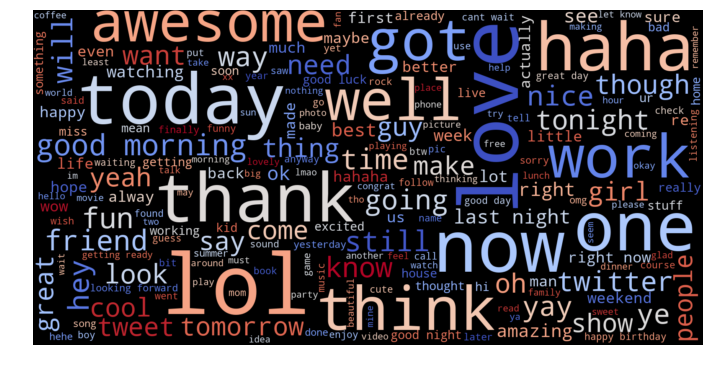

In [34]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap= 'coolwarm').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [35]:
from sklearn.utils import shuffle
clean_tweets = shuffle(clean_tweets)

In [36]:
clean_tweets.head()
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 1209298 to 537980
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


## Null Accuracy (Baseline Model)

In [99]:
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5019333333333333


## Naive bayes with TF IDF

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [38]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [41]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [42]:
predictions = pipeline.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.75      0.74     14942
          1       0.75      0.73      0.74     15058

avg / total       0.74      0.74      0.74     30000



[[11234  3708]
 [ 4011 11047]]
0.7427


## Naive Bayes without using tfidf

In [44]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [45]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)

In [47]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[400 119]
 [111 370]]
             precision    recall  f1-score   support

          0       0.78      0.77      0.78       519
          1       0.76      0.77      0.76       481

avg / total       0.77      0.77      0.77      1000

0.77


## Linear Regression with TF IDF

In [48]:
from sklearn.linear_model import LinearRegression
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [51]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...rue)), ('classifier', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [52]:
predictions = pipeline.predict(X_test)

In [74]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.74      0.72     14942
          1       0.73      0.69      0.71     15058

avg / total       0.72      0.72      0.72     30000



[[11013  3929]
 [ 4612 10446]]
Accuracy is 0.7153


## Linear Regression without TF IDF

In [54]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [55]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
predictions = lr.predict(X_test)

In [71]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[11013  3929]
 [ 4612 10446]]
             precision    recall  f1-score   support

          0       0.70      0.74      0.72     14942
          1       0.73      0.69      0.71     15058

avg / total       0.72      0.72      0.72     30000

Accuracy is:  0.7153


## Logistic Regression with TF IDF

In [75]:
from sklearn.linear_model import LogisticRegression
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [76]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [77]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [78]:
predictions = pipeline.predict(X_test)

In [79]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.73      0.75     14942
          1       0.75      0.78      0.76     15058

avg / total       0.76      0.76      0.76     30000



[[10955  3987]
 [ 3351 11707]]
Accuracy is 0.7554


## Logistic Regression without TF IDF

In [80]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [81]:
log_model.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
predictions = log_model.predict(X_test)

In [83]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10789  4153]
 [ 3411 11647]]
             precision    recall  f1-score   support

          0       0.76      0.72      0.74     14942
          1       0.74      0.77      0.75     15058

avg / total       0.75      0.75      0.75     30000

Accuracy is:  0.7478666666666667


## Random Forest Classification with TF IDF

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [62]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [63]:
predictions = pipeline.predict(X_test)

In [64]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.74      0.73     14942
          1       0.73      0.70      0.72     15058

avg / total       0.72      0.72      0.72     30000



[[11115  3827]
 [ 4529 10529]]
Accuracy is 0.7214666666666667


## Random Forest Classification without TF IDF

In [65]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [66]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
predictions = rf.predict(X_test)

In [68]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[11013  3929]
 [ 4612 10446]]
             precision    recall  f1-score   support

          0       0.70      0.74      0.72     14942
          1       0.73      0.69      0.71     15058

avg / total       0.72      0.72      0.72     30000

Accuracy is:  0.7153


## Support Vector Machines with TF IDF

In [90]:
from sklearn.svm import SVC
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [92]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [93]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [94]:
predictions = pipeline.predict(X_test)

In [95]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.66     14942
          1       0.00      0.00      0.00     15058

avg / total       0.25      0.50      0.33     30000



[[14942     0]
 [15058     0]]
Accuracy is 0.49806666666666666


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Support Vector Machines without tfidf

In [86]:
model = SVC()

In [87]:
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
predictions = model.predict(X_test)

In [89]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[14889    53]
 [14630   428]]
             precision    recall  f1-score   support

          0       0.50      1.00      0.67     14942
          1       0.89      0.03      0.06     15058

avg / total       0.70      0.51      0.36     30000

Accuracy is:  0.5105666666666666


In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
# grid.fit(X_train,y_train)

In [ ]:
# len(cvec.get_feature_names())

it looks like count vectorizer has extracted 264939 words out of the corpus.

In [ ]:
# cvec.get_feature_names()

In [ ]:
# neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
# pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
# neg_tf = np.sum(neg_doc_matrix,axis=0)
# pos_tf = np.sum(pos_doc_matrix,axis=0)
# neg = np.squeeze(np.asarray(neg_tf))
# pos = np.squeeze(np.asarray(pos_tf))
# term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [ ]:
# term_freq_df

In [ ]:
# term_freq_df.columns = ['negative', 'positive']
# term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
# term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

## Tweets Token Visualization

After having seen how the tokens are distributed through the whole corpus, the next question in my head is how different the tokens in two different classes(positive, negative). This time, the stop words will not help much, because of the same high-frequency words, such as "the", "to", will equally frequent in both classes. If these stop words dominate both of the classes, I won't be able to have a meaningful result. So, I decided to remove stop words, and also will limit the max_features to 10,000 with countvectorizer.

In [ ]:
# cvec = CountVectorizer(stop_words='english',max_features=10000)
# cvec.fit(clean_tweets['clean tweet'])

In [ ]:
# len(cvec.get_feature_names())

In [ ]:
# neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
# pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
# neg_tf = np.sum(neg_doc_matrix,axis=0)
# pos_tf = np.sum(pos_doc_matrix,axis=0)
# neg = np.squeeze(np.asarray(neg_tf))
# pos = np.squeeze(np.asarray(pos_tf))
# term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [ ]:
# term_freq_df2.columns = ['negative', 'positive']
# term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
# term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

### Now we will sample the data points to have 100K points and will further divide to testing and training with 70% of the data in training and 30% of data in testing set

In [ ]:
# tweets_sample100K = clean_tweets.sample(n=100000, random_state=101 )

In [ ]:
# tweets_sample100K.head()

In [ ]:
# from nltk.stem import WordNetLemmatizer

In [ ]:
# #
# #  Input : dataframe with a column names 'text' which contains raw tweets (one per row)
# #  Output: A list of lists of tokens corrsponding to the 'text' column
# #
# def tokenize_tweets2(tweets):
#     """Given a df with tweets in 'text' col, this function return tokens as a list of lists"""

#     # apply tokenize to the 'text' coolumn in the tweets df
#     tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
#     tokens = tweets['tweet'].apply(tweet_tokenizer.tokenize)
    
#     # filter
#     misc = ['rt', '’', '…', '—', 'u', '”', 'w', '“', '...', '️', 'http', 'https','..']
#     to_remove = nltk.corpus.stopwords.words('English') + list(string.punctuation) + misc
    
#     lemmatizer = WordNetLemmatizer()
    
#     tokens = [[lemmatizer.lemmatize(token, pos='v') for token in tw if token not in to_remove] for tw in tokens]      
#     return(tokens)

In [ ]:
# all_tokens = tokenize_tweets2(tweets_sample100K)
# print(len(all_tokens))
# all_tokens[:10]

In [ ]:
# tweets_sample100K['all_tokens']=all_tokens

In [ ]:
# tweets_sample100K.head()

In [ ]:
# tweets_sample100K['length'].describe()

In [ ]:
# tweets_sample100K[tweets_sample100K['length']==359]

In [ ]:
# fig, ax = plt.subplots(figsize=(5, 5))
# plt.violinplot(tweets_sample100K['length'])
# #plt.show()

In [ ]:
# tweets_sample100K[tweets_sample100K['length']>140]

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# bow_transformer = CountVectorizer(analyzer = tokenize_tweets2).fit(tweets['tweet'])

In [ ]:
# from collections import Counter

# counts = Counter([token for tokens in all_tokens for token in tokens])
# print(len(counts))
# counts.most_common(20)

In [ ]:
# top_words = [k for k in counts.keys() if counts.get(k) > 50]
# len(top_words)

In [ ]:
# trainingSet_10percent = trainingSet.sample(frac = 0.01)